# Import Moduel

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df_clean = pd.read_csv('input\cleaned_data.csv')

# 資料清理 & EDA

---

* 100,000 筆評分 (1-5)
* 943 位用戶(每位至少評估20部電影)
* 1682 部電影(18部重複)

## Rating 分佈

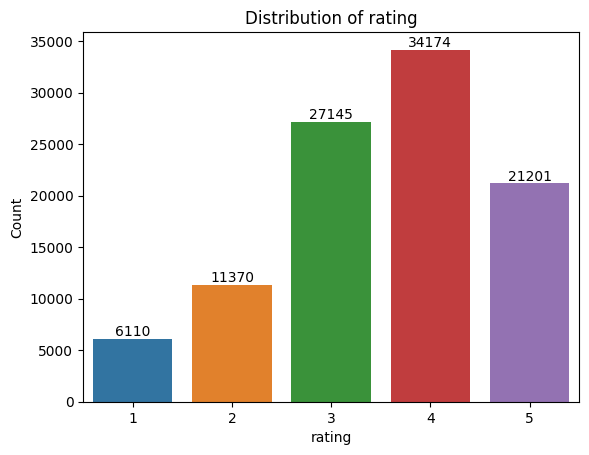

In [3]:
ax = sns.countplot(x='rating', data=df_clean)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, xytext=(0, 5),
                textcoords='offset points')
plt.title(f'Distribution of rating')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

## Genres 分佈

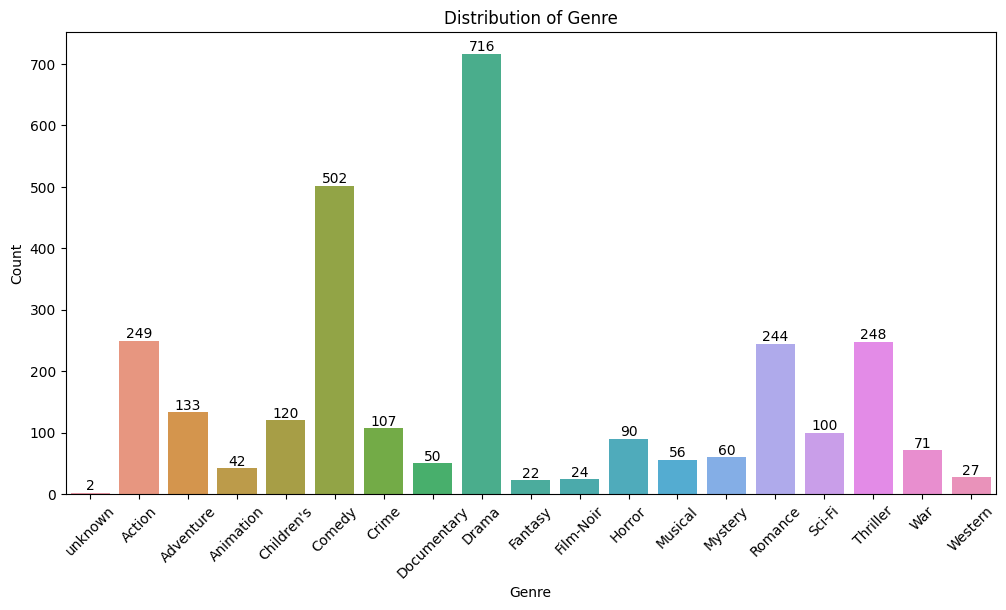

In [4]:
# 電影類別數量 分佈
genres = df_clean.columns[10:]
genres_count = {}
for g in genres:
    genres_count[g] = df_clean.groupby('movie_title')[g].max().sum()
genre_df = pd.DataFrame(genres_count.items(), columns=['Genre', 'Count'])

# 繪圖
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Genre', y = 'Count', data=genre_df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, xytext=(0, 5),
                textcoords='offset points')
plt.title(f'Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 資料去重
---
相同user_id、movie_title; 不同movie_id、timestamp >> 同人同電影重複評論 >> 取平均rating

In [5]:
df_clean_copy = df_clean.copy()
# average_ratings = df_clean.groupby(['user_id', 'movie_title'])['rating'].mean().reset_index()
average_ratings = df_clean.groupby(['user_id', 'movie_title'], as_index=False).agg({"rating":"mean"})
data = df_clean_copy.merge(average_ratings, on=['user_id', 'movie_title'], suffixes=('', '_avg'))
data.drop(columns=['rating'], inplace=True)
data.rename(columns={'rating_avg': 'rating'}, inplace=True)

In [6]:
# check user_id、movie_title 相同的重複評分
data[(data.duplicated(subset=data.columns.difference(['movie_id','timestamp']), keep=False))][['user_id', 'movie_id','movie_title','rating']].sort_values(by='user_id')

,user_id,movie_id,movie_title,rating
46889,1,268,Chasing Amy (1997),5.0
46888,1,246,Chasing Amy (1997),5.0
15363,2,303,Ulee's Gold (1997),4.0
15364,2,297,Ulee's Gold (1997),4.0
80833,3,329,Desperate Measures (1998),4.0
...,...,...,...,...
15501,937,303,Ulee's Gold (1997),4.0
96151,939,266,Kull the Conqueror (1997),2.0
96150,939,680,Kull the Conqueror (1997),2.0
74979,942,304,Fly Away Home (1996),5.0


In [7]:
# 檢查評論人數、電影總數前後落差
data_no_duplicates = data.drop_duplicates(subset=data.columns.difference(['movie_id','timestamp']), keep='last')
print('原資料評論人數 :', df_clean['user_id'].nunique())
print('原資料電影總數 :', df_clean['movie_title'].nunique())
print('不重複的評論者數 :', data_no_duplicates['user_id'].nunique())
print('不重複的電影總數 :', data_no_duplicates['movie_title'].nunique())

原資料評論人數 : 943
原資料電影總數 : 1664
不重複的評論者數 : 943
不重複的電影總數 : 1664


In [8]:
data_no_duplicates['rating'].value_counts().sort_index()

rating
1.0     6083
1.5        3
2.0    11334
2.5        6
3.0    27060
3.5       19
4.0    34042
4.5       16
5.0    21130
Name: count, dtype: int64